In [180]:
df2 = pd.read_csv('liwc2.csv')
df2.head()

,Unnamed: 0,rep_score,function.,pronoun,ppron,i,we,you,shehe,they,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,fIller
0,0,0.25,32.46,3.36,0.75,0.0,0.37,0.0,0.0,0.37,...,0.0,0.00,0.0,0.37,0.00,0.0,0.00,0.0,0.00,0.0
1,1,0.00,37.44,2.96,0.99,0.0,0.99,0.0,0.0,0.00,...,0.0,0.49,0.0,0.00,0.49,0.0,0.49,0.0,0.00,0.0
2,2,0.25,36.06,7.69,3.37,0.0,2.40,0.0,0.0,0.96,...,0.0,0.48,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
3,3,0.33,42.79,2.99,0.50,0.0,0.50,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
4,4,0.00,35.46,1.92,0.96,0.0,0.00,0.0,0.0,0.96,...,0.0,0.64,0.0,0.00,0.32,0.0,0.00,0.0,0.32,0.0


In [186]:
data2 = df2.values
X, y = data2[:, 2:], data2[:, 1]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, X, test_size=0.20, random_state=1)

from sklearn import preprocessing
# Standardising the variables
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

import numpy as np
#Running Lasso: 
from sklearn import linear_model 
lasso = linear_model.MultiTaskLassoCV(max_iter=2000,cv=10,normalize=False)
lasso.fit(X_train,Y_train)
lasso.alpha_

0.004290532595253744

In [86]:
# Train error of Lasso: 
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train,lasso.predict(X_train))

# R^2 of Train sample
rsquared_train = lasso.score(X_train,Y_train)
print("The MSE on Train data is :", mse_train)
print("The R^2 on Train data is:", rsquared_train)

The MSE on Train data is : 0.00018287177580221628
The R^2 on Train data is: 0.9997329177191494


In [87]:
# Test error of Lasso: 
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(Y_test,lasso.predict(X_test))

# R^2 of Test sample
rsquared_test=lasso.score(X_test,Y_test)
print("The MSE on Test data is :", mse_test)
print("The R^2 on Test data is:", rsquared_test)

The MSE on Test data is : 0.0034528798480573755
The R^2 on Test data is: 0.9702974032710903


In [96]:
lasso=Lasso(alpha=0.005) # lasso that has the probability of equalizing the beta values to 0
lasso.fit(X_train, Y_train)
lasso_train_r2=lasso.score(X_train, Y_train)
lasso_test_r2=lasso.score(X_test, Y_test)
print('Lasso model (alpha=0.005) train r^2..:', lasso_train_r2)
print('Lasso model (alpha=0.005) test r^2..:', lasso_test_r2)

Lasso model (alpha=0.005) train r^2..: 0.9998212063949787
Lasso model (alpha=0.005) test r^2..: 0.9694887122405077


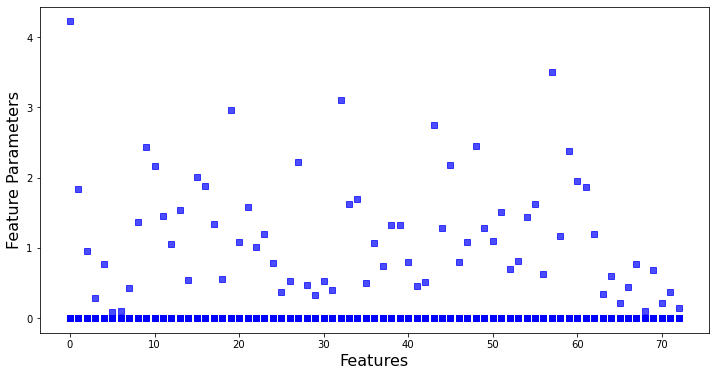

In [89]:
# visualize the values of the beta parameters
plt.figure(figsize=(12,6))
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='s', color = 'blue')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Feature Parameters', fontsize=16)
plt.show()

In [127]:
ypred = lasso.predict(X_test)

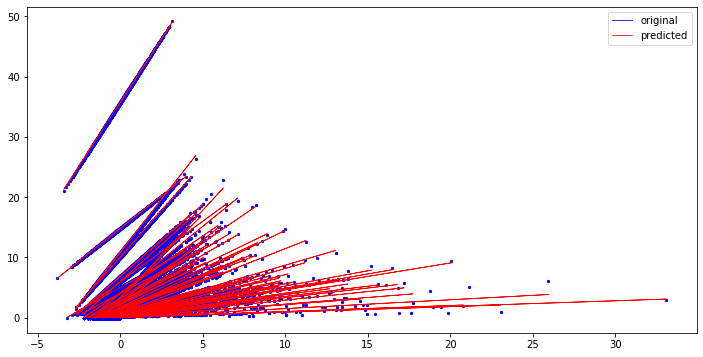

In [169]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test, s=5, color="blue")
plt.plot(X_test, ypred,lw=0.8, color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

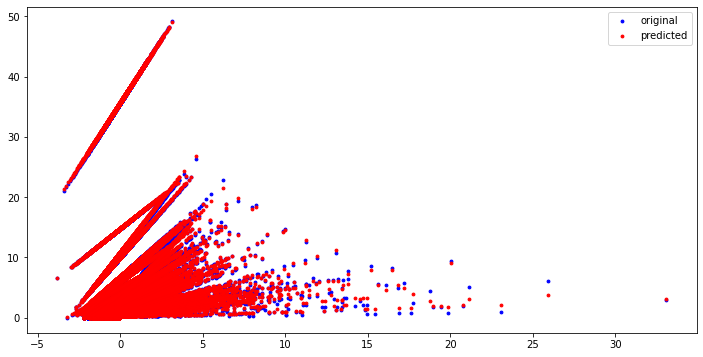

In [177]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test, s=8, color="blue")
plt.scatter(X_test, ypred,s=8, color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

In [152]:
y_pred = lasso.predict(X_train)

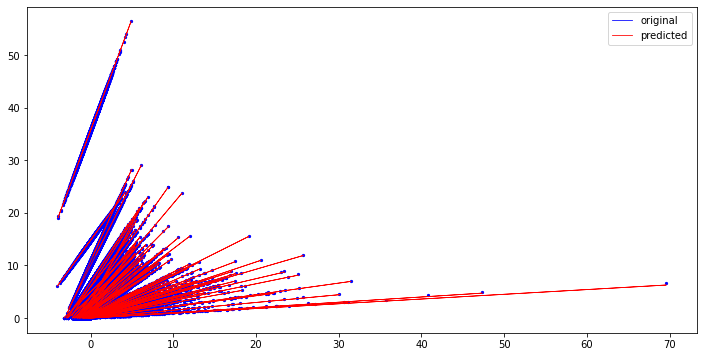

In [167]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train, s=5,color="blue")
plt.plot(X_train, y_pred,lw=0.8,color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

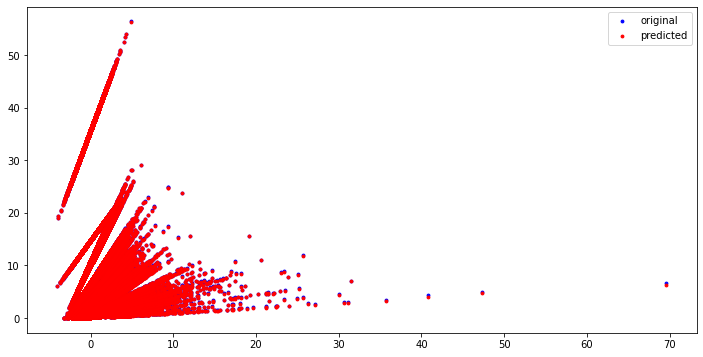

In [175]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train, s=8,color="blue")
plt.scatter(X_train, y_pred,s=8,color="red")
plt.legend(["original","predicted"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color("blue")
leg.legendHandles[1].set_color("red")
plt.show()

In [182]:
df2.drop(df2.columns[[0,1]], axis = 1, inplace = True)

In [183]:
df2

,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,fIller
0,32.46,3.36,0.75,0.00,0.37,0.0,0.0,0.37,2.61,7.46,...,0.00,0.00,0.0,0.37,0.00,0.0,0.00,0.0,0.00,0.0
1,37.44,2.96,0.99,0.00,0.99,0.0,0.0,0.00,1.97,13.79,...,0.00,0.49,0.0,0.00,0.49,0.0,0.49,0.0,0.00,0.0
2,36.06,7.69,3.37,0.00,2.40,0.0,0.0,0.96,4.33,6.73,...,0.00,0.48,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
3,42.79,2.99,0.50,0.00,0.50,0.0,0.0,0.00,2.49,12.94,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
4,35.46,1.92,0.96,0.00,0.00,0.0,0.0,0.96,0.96,7.35,...,0.00,0.64,0.0,0.00,0.32,0.0,0.00,0.0,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12741,37.80,4.31,1.91,0.48,1.44,0.0,0.0,0.00,2.39,5.74,...,0.00,0.48,0.0,0.00,0.96,0.0,0.00,0.0,0.96,0.0
12742,38.94,3.54,0.88,0.00,0.88,0.0,0.0,0.00,2.65,7.96,...,0.44,0.00,0.0,0.44,0.00,0.0,0.00,0.0,0.00,0.0
12743,37.30,1.57,0.63,0.00,0.63,0.0,0.0,0.00,0.94,5.96,...,0.00,2.19,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
12744,38.49,2.96,1.32,0.00,0.99,0.0,0.0,0.33,1.64,5.92,...,0.00,0.00,0.0,0.00,0.66,0.0,0.00,0.0,0.66,0.0


In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['variable'] = df2.columns

In [185]:
vif.describe(include='all')

,VIF,variable
count,73.000000,73
unique,NaN,73
top,NaN,nonflu
freq,NaN,1
mean,8423.913471,NaN
std,47108.438604,NaN
min,1.029424,NaN
25%,2.434955,NaN
50%,10.182700,NaN
75%,69.973082,NaN
